In [47]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torch.nn as nn
import torch.nn.functional as F
import os
import cv2 as cv

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda:0


# EMNIST part

In [236]:
def transpose_transform(img):
    transposed = TF.rotate(TF.hflip(img), 90)
    return transposed.repeat(3, 1, 1)


transform = transforms.Compose([
    transforms.ToTensor(),
    transpose_transform,
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
])
batch_size = 64

trainset = torchvision.datasets.EMNIST(root='./data', train=True, split='byclass',
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = torchvision.datasets.EMNIST(root='./data', train=False, split='byclass',
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True)

classes = (
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    97,
    98,
    99,
    100,
    101,
    102,
    103,
    104,
    105,
    106,
    107,
    108,
    109,
    110,
    111,
    112,
    113,
    114,
    115,
    116,
    117,
    118,
    119,
    120,
    121,
    122,
)
print(len(classes))

62


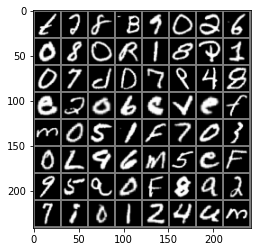

t 2 8 B 9 O 2 6 O 8 O R 1 8 P 1 0 7 d D 7 P 4 8 e 2 O 6 C V e f M 0 5 1 f 7 0 3 o L 9 6 m 5 e F 9 5 q r F 8 a 2 7 i O 1 2 4 U M


In [136]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{chr(classes[labels[j]])}' for j in range(batch_size)))

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=3,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, len(classes))
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output

net = CNN()
net = net.to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.571
[1,   400] loss: 0.536
[1,   600] loss: 0.539
[1,   800] loss: 0.519
[1,  1000] loss: 0.523
[1,  1200] loss: 0.523
[1,  1400] loss: 0.513
[1,  1600] loss: 0.521
[1,  1800] loss: 0.520
[1,  2000] loss: 0.530
[1,  2200] loss: 0.508
[1,  2400] loss: 0.506
[1,  2600] loss: 0.514
[1,  2800] loss: 0.495
[1,  3000] loss: 0.501
[1,  3200] loss: 0.491
[1,  3400] loss: 0.489
[1,  3600] loss: 0.495
[1,  3800] loss: 0.491
[1,  4000] loss: 0.490
[1,  4200] loss: 0.487
[1,  4400] loss: 0.485
[1,  4600] loss: 0.477
[1,  4800] loss: 0.479
[1,  5000] loss: 0.489
[1,  5200] loss: 0.471
[1,  5400] loss: 0.485
[1,  5600] loss: 0.477
[1,  5800] loss: 0.471
[1,  6000] loss: 0.453
[1,  6200] loss: 0.463
[1,  6400] loss: 0.461
[1,  6600] loss: 0.465
[1,  6800] loss: 0.459
[1,  7000] loss: 0.457
[1,  7200] loss: 0.455
[1,  7400] loss: 0.470
[1,  7600] loss: 0.469
[1,  7800] loss: 0.446
[1,  8000] loss: 0.446
[1,  8200] loss: 0.436
[1,  8400] loss: 0.452
[1,  8600] loss: 0.465
[1,  8800] 

In [24]:
PATH = './emnist_cnn1.pth'
torch.save(net.state_dict(), PATH)

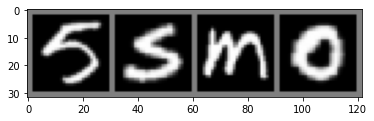

GroundTruth:  5 S M O
Predicted:  5 S M O


In [28]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.to(DEVICE)[:4]
labels = labels.to(DEVICE)[:4]

# print images
imshow(torchvision.utils.make_grid(images.cpu()))
print('GroundTruth: ', ' '.join(f'{chr(classes[labels[j]])}' for j in range(4)))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{chr(classes[predicted[j]])}'
                              for j in range(4)))

In [32]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(DEVICE), data[1].to(DEVICE)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 84 %


# DeepDream part

In [37]:
net

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=62, bias=True)
)

In [161]:
def load_image(img_path, target_shape=None):
    if not os.path.exists(img_path):
        raise Exception(f'Path does not exist: {img_path}')
    img = cv.imread(img_path)[:, :, ::-1]  # [:, :, ::-1] converts BGR (opencv format...) into RGB

    if target_shape is not None:  # resize section
        if isinstance(target_shape, int) and target_shape != -1:  # scalar -> implicitly setting the width
            current_height, current_width = img.shape[:2]
            new_width = target_shape
            new_height = int(current_height * (new_width / current_width))
            img = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_CUBIC)
        else:  # set both dimensions to target shape
            img = cv.resize(img, (target_shape[1], target_shape[0]), interpolation=cv.INTER_CUBIC)

    # this need to go after resizing - otherwise cv.resize will push values outside of [0,1] range
    img = img.astype(np.float32)  # convert from uint8 to float32
    img /= 255.0  # get to [0, 1] range
    return img

In [266]:
def deep_dream_simple(img, class_index=10):
    """
        Contains the gist of DeepDream algorithm - takes 5 minutes to write down - if you know what you're doing.
        No support for: spatial shifting (aka jitter), octaves/image pyramid, clipping, gradient smoothing, etc.
        Most of the "code" are comments otherwise it literally takes 15 minutes to write down.
    """
    # img = cv.Sobel(src=img, ddepth=cv.CV_32F, dx=1, dy=1, ksize=3)
    # edge_img = np.copy(img)
    # old_img = img.copy()

    # Normalize image - VGG 16 and in general Pytorch (torchvision) models were trained like this,
    # so they learned to work with this particular distribution
    img = (img - 0.5) / 0.5
    # Transform into PyTorch tensor, send to GPU and add dummy batch dimension. Models are expecting it, GPUs are
    # highly parallel computing machines so in general we'd like to process multiple images all at once
    # shape = (1, 3, H, W)
    img_tensor = transforms.ToTensor()(img).to(DEVICE).unsqueeze(0)
    img_tensor.requires_grad = True  # set this to true so that PyTorch will start calculating gradients for img_tensor

    # model = CNN(requires_grad=False).to(DEVICE)  # Instantiate VGG 16 and send it to GPU
    model = net.to(DEVICE)

    n_iterations = 10
    learning_rate = 0.05

    for iter in range(n_iterations):
        out = model(img_tensor)
        # activations = out.relu4_3  # pick out particular feature maps (aka activations) that you're interested in
        letter = torch.zeros([1, len(classes)]).to(DEVICE)
        # print(letter)
        letter[0][class_index] = 1
        out.backward(letter)  # whatever is the biggest activation value make it even bigger

        img_tensor_grad = img_tensor.grad.data
        smooth_grads = img_tensor_grad / torch.std(img_tensor_grad)
        img_tensor.data += learning_rate * smooth_grads  # gradient ascent

        img_tensor.grad.data.zero_()  # clear the gradients otherwise they would get accumulated

    # Send the PyTorch tensor back to CPU, detach it from the computational graph, convert to numpy
    # and make it channel last format again (calling ToTensor converted it to channel-first format)
    # img = np.moveaxis(img_tensor.to('cpu').detach().numpy()[0], 0, 2)
    # img = (img * 0.5) + 0.5  # de-normalize
    # img = (np.clip(img, 0., 1.) * 255).astype(np.uint8)
    # return old_img, img
    return img_tensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


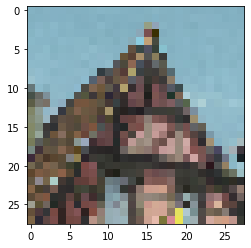

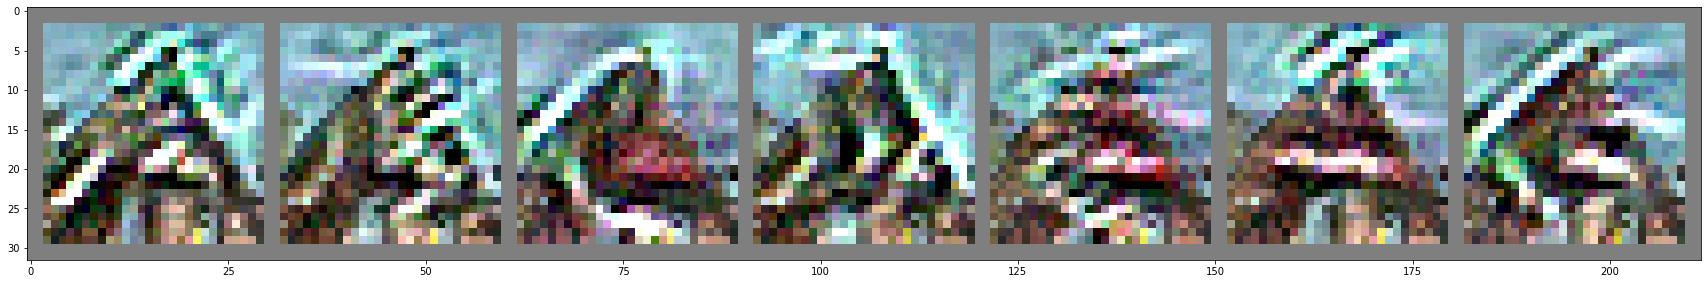

In [267]:
# original, new = deep_dream_simple('./test5.png')
img = load_image('./test5.png', target_shape=28)  # load numpy, [0, 1] image

dream_classes = [10, 11, 12, 13, 14, 15, 16]
images = [deep_dream_simple(img, c) for c in dream_classes]

images = torch.concat(images, dim=0).cpu()
plt.figure(1)
plt.imshow(img)
plt.figure(figsize=(30,6))
imshow(torchvision.utils.make_grid(images))